In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 1.Data Collection and Loading
print("Step 1: Loading Data")
df = pd.read_csv('creditcard.csv')
print("Dataset Shape:", df.shape)

Step 1: Loading Data
Dataset Shape: (284807, 31)



Step 2: Exploratory Data Analysis

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V

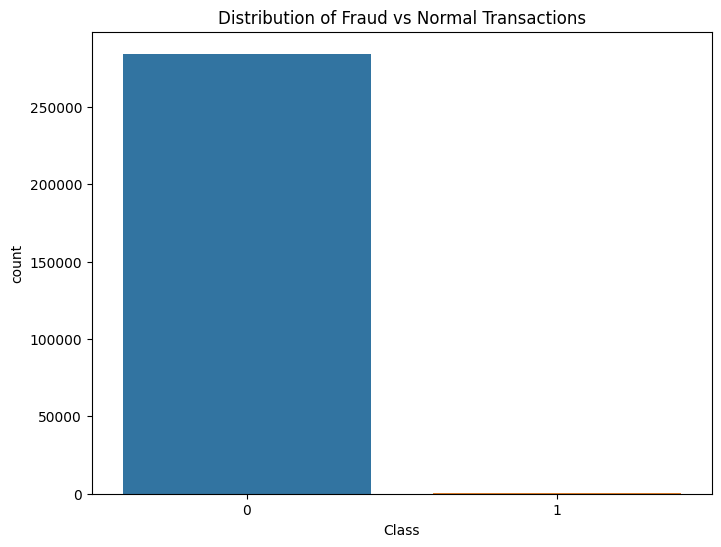

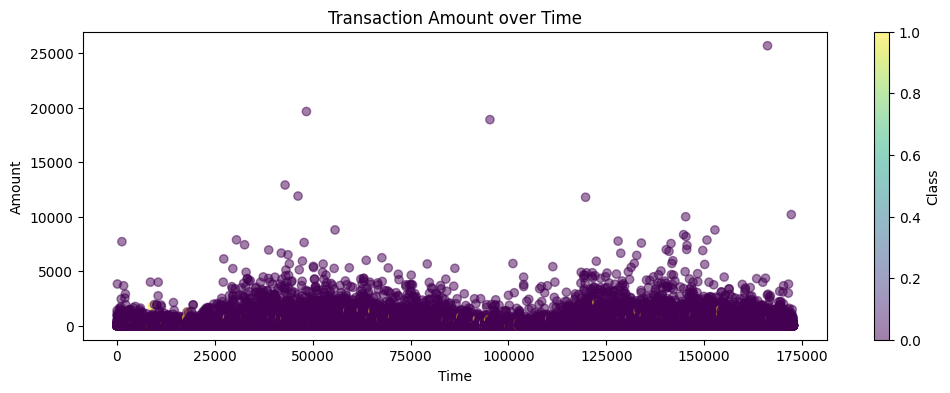

In [3]:
# 2.Exploratory Data Analysis (EDA)
print("\nStep 2: Exploratory Data Analysis")

# Check basic information
print("\nData Info:")
print(df.info())

# Check class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts(normalize=True))

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Class')
plt.title('Distribution of Fraud vs Normal Transactions')
plt.show()

# Time series visualization
plt.figure(figsize=(12, 4))
plt.scatter(df['Time'], df['Amount'], c=df['Class'], alpha=0.5)
plt.title('Transaction Amount over Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.colorbar(label='Class')
plt.show()


In [4]:
# 3. Data Preprocessing
print("\nStep 3: Data Preprocessing")

# Scale Amount and Time features
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original Amount and Time columns
df = df.drop(['Time', 'Amount'], axis=1)

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Step 3: Data Preprocessing
Training set shape: (227845, 30)
Testing set shape: (56962, 30)


In [5]:
# 4. Handle Imbalanced Data
print("\nStep 4: Handling Imbalanced Data")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original training set shape:", X_train.shape)
print("Balanced training set shape:", X_train_balanced.shape)
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True))


Step 4: Handling Imbalanced Data
Original training set shape: (227845, 30)
Balanced training set shape: (454902, 30)

Class distribution after SMOTE:
Class
0    0.5
1    0.5
Name: proportion, dtype: float64



Step 5: Feature Engineering and Selection


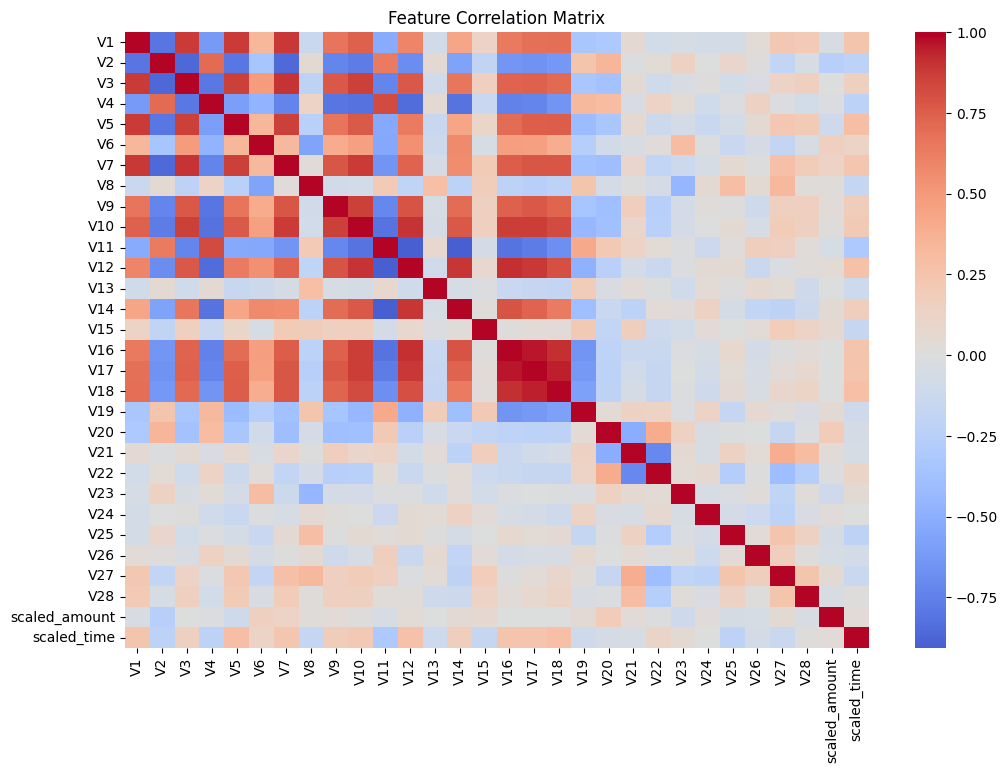

In [6]:
# 5. Feature Engineering and Selection
print("\nStep 5: Feature Engineering and Selection")

# Calculate correlation matrix
correlation_matrix = X_train_balanced.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [7]:
# 6. Model Training
print("\nStep 6: Model Training")

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]


Step 6: Model Training



Step 7: Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



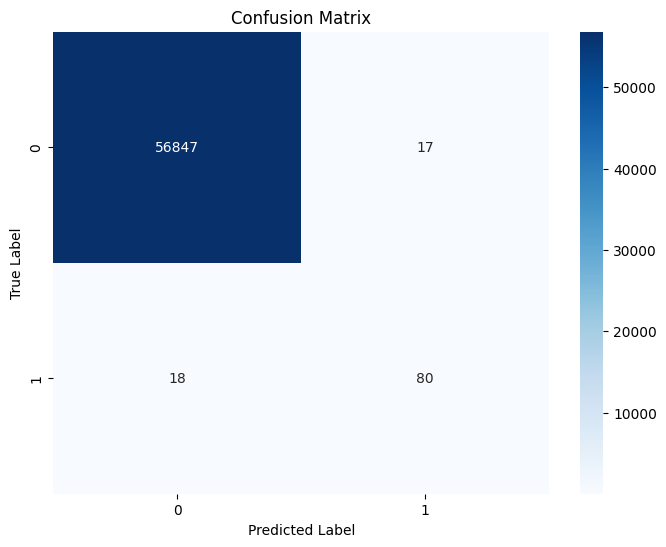

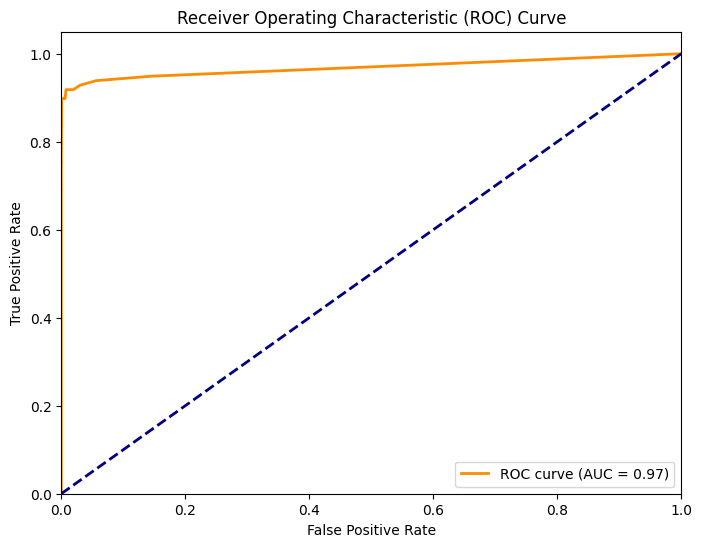

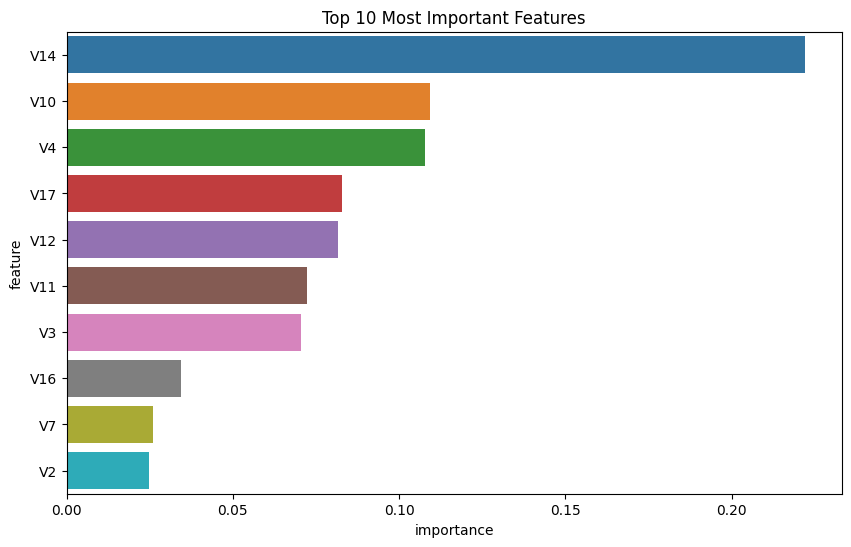

In [8]:
# 7. Model Evaluation
print("\nStep 7: Model Evaluation")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()


Step 7: Model Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



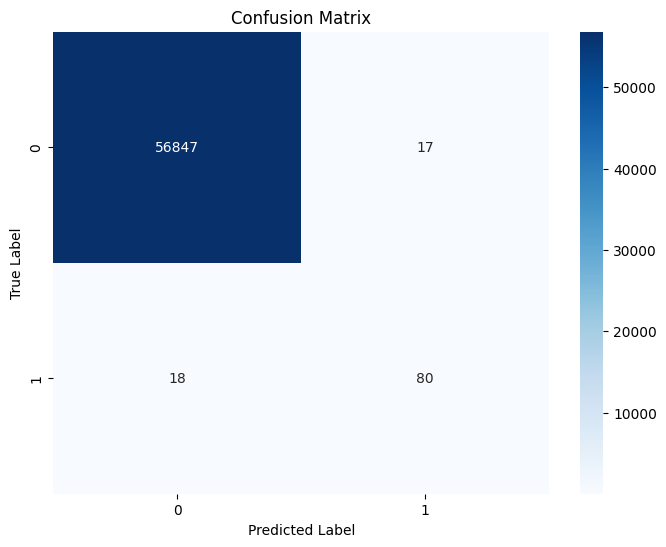

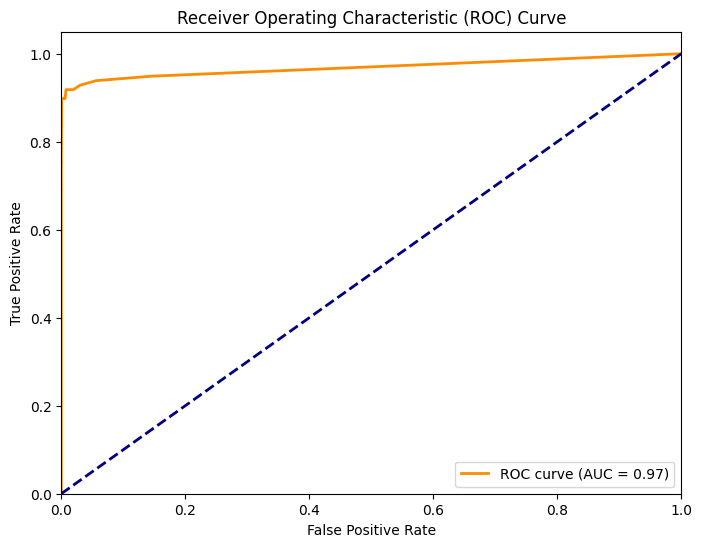

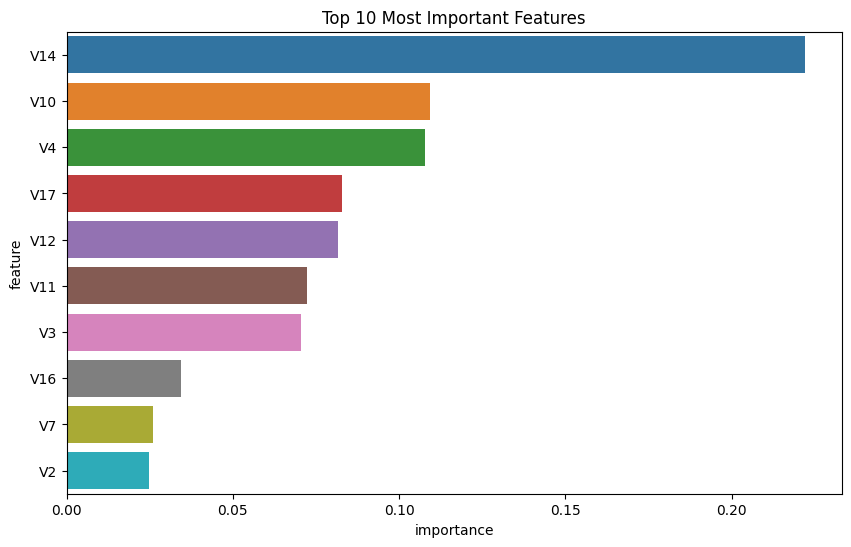

In [9]:
# 7. Model Evaluation
print("\nStep 7: Model Evaluation")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

In [10]:
# 9. Model Deployment Preparation
print("\nStep 9: Model Deployment Preparation")

# Save model and scaler
import joblib

# Save the model
joblib.dump(rf_model, 'fraud_detection_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("\nModel and scaler saved successfully!")

# Example of prediction pipeline
def predict_transaction(transaction_data, model, scaler):
    # Scale the data
    scaled_data = scaler.transform(transaction_data)
    # Make prediction
    prediction = model.predict(scaled_data)
    probability = model.predict_proba(scaled_data)[:, 1]
    return prediction, probability

print("\nPrediction pipeline ready for deployment!")


Step 9: Model Deployment Preparation

Model and scaler saved successfully!

Prediction pipeline ready for deployment!
